In [1]:
import pandas as pd

In [2]:
all_stats = pd.read_csv("all_stats.csv", index_col=0)

In [3]:
all_stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,0.539,...,0.0,0.000,Los Angeles Lakers,62,20,0.756,0.0,117.3,109.5,6.84
1,Byron Scott,SG,24,LAL,76,62,28.8,6.7,13.0,0.513,...,0.0,0.000,Los Angeles Lakers,62,20,0.756,0.0,117.3,109.5,6.84
2,James Worthy,SF,24,LAL,75,73,32.7,8.4,14.5,0.579,...,780.0,0.009,Los Angeles Lakers,62,20,0.756,0.0,117.3,109.5,6.84
3,Jerome Henderson,C,26,LAL,1,0,3.0,2.0,3.0,0.667,...,0.0,0.000,Los Angeles Lakers,62,20,0.756,0.0,117.3,109.5,6.84
4,Kareem Abdul-Jabbar,C,38,LAL,79,79,33.3,9.6,16.9,0.564,...,780.0,0.173,Los Angeles Lakers,62,20,0.756,0.0,117.3,109.5,6.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16405,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,0.0,0.000,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
16406,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,0.0,0.000,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
16407,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,0.0,0.000,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
16408,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,0.0,0.000,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


In [4]:
pd.isnull(all_stats).sum()

Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          63
3P            0
3PA           0
3P%        2376
2P            0
2PA           0
2P%         106
eFG%         63
FT            0
FTA           0
FT%         556
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
dtype: int64

In [5]:
all_stats[pd.isnull(all_stats["3P%"])][["Player", "3PA"]].head()

,Player,3PA
3,Jerome Henderson,0.0
5,Kurt Rambis,0.0
12,Pétur Guðmundsson,0.0
20,Kurt Rambis,0.0
23,Mike Smrek,0.0


In [6]:
all_stats[pd.isnull(all_stats["FT%"])][["Player", "FTA"]].head()

,Player,FTA
3,Jerome Henderson,0.0
144,John Coker,0.0
159,Jason Sasser,0.0
170,Adrian Caldwell,0.0
186,Bruno Šundov,0.0


In [7]:
all_stats = all_stats.fillna(0)

In [9]:
all_stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

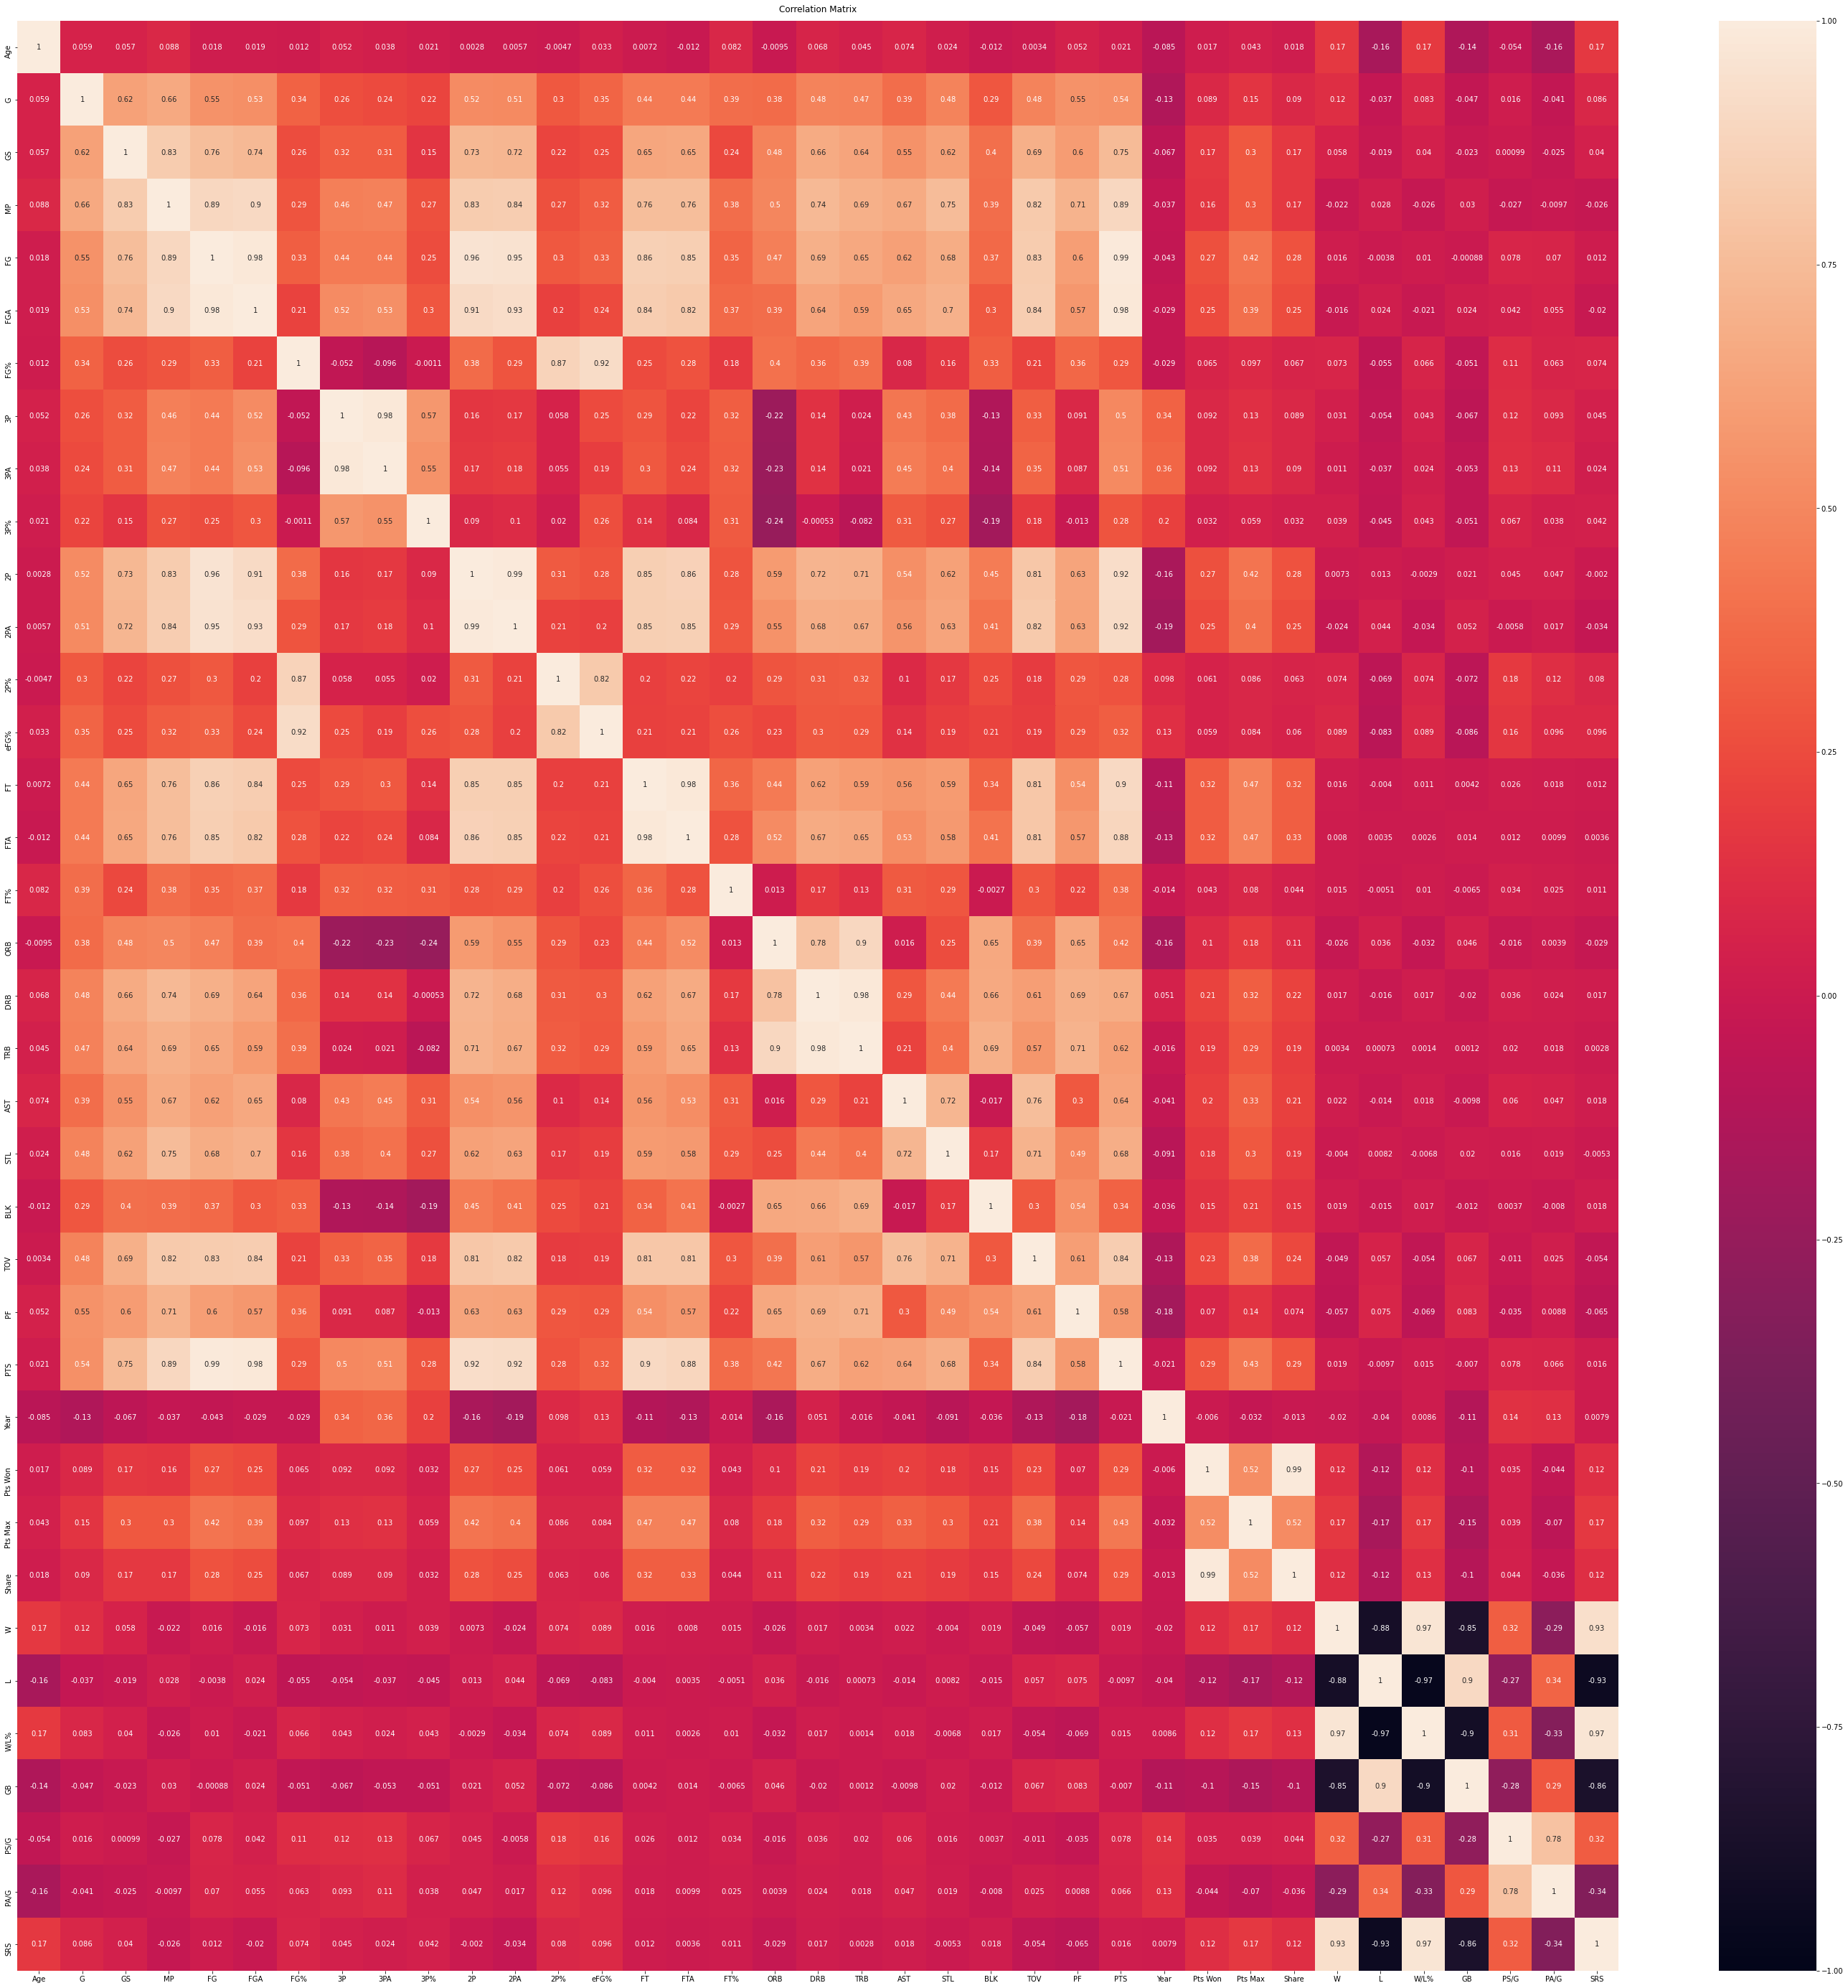

In [30]:
all_stats.corr()
plt.figure(figsize=(50, 50))
heatmap = sns.heatmap(all_stats.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':12}, pad=12);
plt.savefig("correlation_matrix.png")

In [93]:
predictors = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS']
        
# Removed strings and Pts Won, Pts Max and Share as those 3 things are what we are trying to predict

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
train = all_stats[~(all_stats["Year"] == 2022)]
test = all_stats[all_stats["Year"] == 2022]

In [103]:
model = LinearRegression()
model.fit(train[predictors],train["Share"])

LinearRegression()

In [104]:
predictions = model.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)

In [105]:
join = pd.concat([test[["Player", "Share"]], predictions], axis=1)
join.sort_values("Share", ascending=False).head(20)

,Player,Share,predictions
730,Nikola Jokić,0.875,0.201721
904,Joel Embiid,0.706,0.198793
13036,Giannis Antetokounmpo,0.595,0.223702
974,Devin Booker,0.216,0.092534
12827,Luka Dončić,0.146,0.161023
1246,Jayson Tatum,0.043,0.099904
13648,Ja Morant,0.010,0.119070
6994,Stephen Curry,0.004,0.097702
972,Chris Paul,0.002,0.083889
8963,LeBron James,0.001,0.161324


In [106]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

In [107]:
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
lasso = LassoCV(cv=cv, n_jobs=-1)
lasso.fit(train[predictors],train["Share"])

C:\Users\stnya\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2823440406206075, tolerance: 0.0055485680277127985
  model = cd_fast.enet_coordinate_descent(


LassoCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=1), n_jobs=-1)

In [108]:
lasso_predictions = lasso.predict(test[predictors])
lasso_predictions = pd.DataFrame(lasso_predictions, columns=["predictions"], index=test.index)

In [109]:
lasso_join = pd.concat([test[["Player", "Share"]], predictions], axis=1)

In [110]:
lasso_join.sort_values("Share", ascending=False).head(20)

,Player,Share,predictions
730,Nikola Jokić,0.875,0.201721
904,Joel Embiid,0.706,0.198793
13036,Giannis Antetokounmpo,0.595,0.223702
974,Devin Booker,0.216,0.092534
12827,Luka Dončić,0.146,0.161023
1246,Jayson Tatum,0.043,0.099904
13648,Ja Morant,0.010,0.119070
6994,Stephen Curry,0.004,0.097702
972,Chris Paul,0.002,0.083889
8963,LeBron James,0.001,0.161324


In [112]:
print('alpha: %f' % lasso.alpha_)

alpha: 0.000295


In [56]:
from sklearn.metrics import mean_squared_error

mean_squared_error(join["Share"], join["predictions"])

0.0023020346439731184

In [58]:
join["Share"].value_counts()

0.000    593
0.001      3
0.146      1
0.043      1
0.002      1
0.216      1
0.004      1
0.010      1
0.595      1
0.706      1
0.875      1
Name: Share, dtype: int64

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
rf = RandomForestRegressor(random_state = 2, n_estimators = 100)
rf.fit(train[predictors],train["Share"])

RandomForestRegressor(random_state=2)

In [72]:
rf_predictions = rf.predict(test[predictors])
rf_predictions = pd.DataFrame(rf_predictions, columns=["predictions"], index=test.index)

In [73]:
rf_join = pd.concat([test[["Player", "Share"]], rf_predictions], axis=1)

In [74]:
rf_join.sort_values("Share", ascending=False).head(20)

,Player,Share,predictions
730,Nikola Jokić,0.875,0.33897
904,Joel Embiid,0.706,0.44352
13036,Giannis Antetokounmpo,0.595,0.32469
974,Devin Booker,0.216,0.45517
12827,Luka Dončić,0.146,0.24154
1246,Jayson Tatum,0.043,0.10736
13648,Ja Morant,0.010,0.35906
6994,Stephen Curry,0.004,0.10231
972,Chris Paul,0.002,0.11141
8963,LeBron James,0.001,0.20676


In [75]:
from sklearn import neighbors

In [76]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 9, weights = 'uniform')
knn.fit(train[predictors],train["Share"])

KNeighborsRegressor(n_neighbors=9)

In [77]:
knn_predictions = knn.predict(test[predictors])
knn_predictions = pd.DataFrame(knn_predictions, columns=["predictions"], index=test.index)

In [78]:
knn_join = pd.concat([test[["Player", "Share"]], knn_predictions], axis=1)

In [79]:
knn_join.sort_values("Share", ascending=False).head(20)

,Player,Share,predictions
730,Nikola Jokić,0.875,0.202000
904,Joel Embiid,0.706,0.179667
13036,Giannis Antetokounmpo,0.595,0.297889
974,Devin Booker,0.216,0.239667
12827,Luka Dončić,0.146,0.030333
1246,Jayson Tatum,0.043,0.090778
13648,Ja Morant,0.010,0.133667
6994,Stephen Curry,0.004,0.023444
972,Chris Paul,0.002,0.015333
8963,LeBron James,0.001,0.000111


In [80]:
from sklearn.neural_network import MLPRegressor

In [84]:
ann = MLPRegressor(
    solver='lbfgs',
    hidden_layer_sizes=100,
    max_iter=10000,
    random_state=10,
    activation='identity',
    learning_rate ='invscaling')

ann.fit(train[predictors],train["Share"])

MLPRegressor(activation='identity', hidden_layer_sizes=100,
             learning_rate='invscaling', max_iter=10000, random_state=10,
             solver='lbfgs')

In [85]:
ann_predictions = ann.predict(test[predictors])
ann_predictions = pd.DataFrame(ann_predictions, columns=["predictions"], index=test.index)

In [86]:
ann_join = pd.concat([test[["Player", "Share"]], ann_predictions], axis=1)

In [87]:
ann_join.sort_values("Share", ascending=False).head(20)

,Player,Share,predictions
730,Nikola Jokić,0.875,0.255409
904,Joel Embiid,0.706,0.261640
13036,Giannis Antetokounmpo,0.595,0.288838
974,Devin Booker,0.216,0.034211
12827,Luka Dončić,0.146,0.170635
1246,Jayson Tatum,0.043,0.096927
13648,Ja Morant,0.010,0.113966
6994,Stephen Curry,0.004,0.095754
972,Chris Paul,0.002,0.093366
8963,LeBron James,0.001,0.127322
